In [4]:
import zipfile,os
local_zip = 'img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

base_dir ='img'


In [2]:
!pip install split-folders

In [5]:
import splitfolders
splitfolders.ratio(base_dir, output=base_dir, ratio=(0.7,0.3))
 
train = os.path.join(base_dir, 'train')
val = os.path.join(base_dir, 'val')

Copying files: 420 files [00:03, 134.47 files/s]


In [6]:
os.listdir('img/train')
os.listdir('img/val')

['AAA',
 'ABI',
 'AFI',
 'AGH',
 'AIL',
 'ARL',
 'ASA',
 'BDL',
 'DIA',
 'DIO',
 'DRA',
 'EZA',
 'FAR',
 'FMR',
 'FRS',
 'GLA',
 'GPS',
 'HMA',
 'HZR',
 'IDR',
 'KDA',
 'MAA',
 'MAJ',
 'MFA',
 'MFH',
 'MGN',
 'MMF',
 'MRF',
 'MSA',
 'MZA',
 'MZB',
 'NIS',
 'QTH',
 'RCK',
 'RKS',
 'SHE',
 'SNN',
 'SVD',
 'SYH',
 'SYN',
 'YSS',
 'ZHT']

### Pre-Processing

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                fill_mode = 'nearest')

In [8]:
train_generator = train_datagen.flow_from_directory(
        train,
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        val,
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

Found 294 images belonging to 42 classes.
Found 126 images belonging to 42 classes.


### CNN

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(42, activation='softmax')
])

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [12]:
history=model.fit(
    train_generator,
    epochs=10, 
    verbose=2,
    validation_data=test_generator
)

Epoch 1/10
10/10 - 25s - loss: 39.4602 - accuracy: 0.0170 - val_loss: 3.6439 - val_accuracy: 0.0556
Epoch 2/10
10/10 - 20s - loss: 3.4911 - accuracy: 0.1156 - val_loss: 2.7160 - val_accuracy: 0.3413
Epoch 3/10
10/10 - 21s - loss: 2.5163 - accuracy: 0.3299 - val_loss: 1.8384 - val_accuracy: 0.5159
Epoch 4/10
10/10 - 20s - loss: 2.0707 - accuracy: 0.4218 - val_loss: 1.4692 - val_accuracy: 0.5952
Epoch 5/10
10/10 - 22s - loss: 1.3285 - accuracy: 0.6463 - val_loss: 0.7998 - val_accuracy: 0.8175
Epoch 6/10
10/10 - 20s - loss: 1.2694 - accuracy: 0.6837 - val_loss: 0.6625 - val_accuracy: 0.7698
Epoch 7/10
10/10 - 20s - loss: 0.8296 - accuracy: 0.7857 - val_loss: 0.6157 - val_accuracy: 0.8254
Epoch 8/10
10/10 - 23s - loss: 0.7304 - accuracy: 0.8129 - val_loss: 0.5486 - val_accuracy: 0.8413
Epoch 9/10
10/10 - 21s - loss: 0.5959 - accuracy: 0.8673 - val_loss: 0.3507 - val_accuracy: 0.9286
Epoch 10/10
10/10 - 21s - loss: 0.3271 - accuracy: 0.8946 - val_loss: 0.3194 - val_accuracy: 0.9127


### Hasil

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


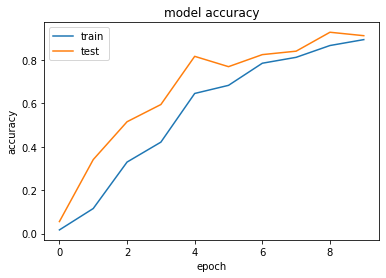

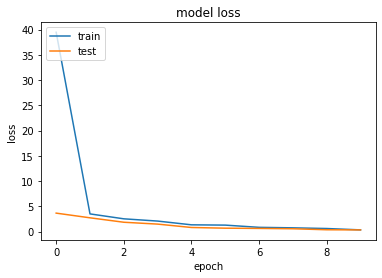

In [13]:
import matplotlib.pyplot as plt
print(history.history.keys())
# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
import pandas as pd
result = pd.DataFrame(
    [history.history['loss'],history.history['val_loss'],history.history['accuracy'],history.history['val_accuracy']],
    index=["loss","val_loss","accuracy","val_accuracy"],
    columns=[f'epoch_{num + 1}' for num in range(10)])

result

,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,epoch_10
loss,39.460232,3.491104,2.516318,2.070681,1.328518,1.269374,0.829589,0.730375,0.595891,0.327059
val_loss,3.643857,2.716001,1.838393,1.469216,0.799770,0.662535,0.615694,0.548588,0.350746,0.319375
accuracy,0.017007,0.115646,0.329932,0.421769,0.646259,0.683673,0.785714,0.812925,0.867347,0.894558
val_accuracy,0.055556,0.341270,0.515873,0.595238,0.817460,0.769841,0.825397,0.841270,0.928571,0.912698
